### Setting up the environment

In [70]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_venn as v
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

SyntaxError: invalid syntax (<ipython-input-70-d8787c5c06e7>, line 5)

In [15]:
# read csv files
train = pd.read_csv('data/google-quest-challenge/train.csv')
test = pd.read_csv('data/google-quest-challenge/test.csv')
sample_submission = pd.read_csv('data/google-quest-challenge/sample_submission.csv')

### Exploring the data

#### Overview of data

In [4]:
# exploring train data
train # 6079 Q&A pairs

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.000000,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.000000,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.000000,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.000000,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,9642,Using a ski helmet for winter biking,I am curious if anyone uses a skiing helmet fo...,sixtyfootersdude,https://bicycles.stackexchange.com/users/134,If you're thinking about wearing a ski helmet ...,Matt Leo,https://bicycles.stackexchange.com/users/3340,http://bicycles.stackexchange.com/questions/99...,CULTURE,...,0.777778,1.000000,0.555556,1.000000,1.000000,0.866667,0.000000,0.000000,0.000000,0.888889
6075,9643,Adjustment to road bike brakes for high grade ...,I have a road bike with a front brake that wea...,ash,https://bicycles.stackexchange.com/users/14519,\nYou can replace the pads (as stated elsewher...,Daniel R Hicks,https://bicycles.stackexchange.com/users/1584,http://bicycles.stackexchange.com/questions/25...,CULTURE,...,0.777778,0.888889,0.555556,1.000000,1.000000,0.733333,0.666667,0.333333,0.000000,0.888889
6076,9645,Suppress 'file truncated' messages when using ...,I'm tailing a log file using tail -f messages....,Maneating Koala,https://unix.stackexchange.com/users/60445,Maybe help if can be fixes origin of this erro...,BG Bruno,https://unix.stackexchange.com/users/68208,http://unix.stackexchange.com/questions/169054...,TECHNOLOGY,...,0.444444,0.888889,0.555556,0.888889,0.888889,0.800000,1.000000,0.000000,0.333333,0.555556
6077,9646,When should a supervisor be a co-author?,What are people's views on this? To be specif...,MrB,https://mathoverflow.net/users/2189,"As a non-mathematician, I am somewhat mystifie...",angela,https://mathoverflow.net/

In [5]:
print(train.columns)
print(len([col for col in train.columns if col.startswith('question')])) # 25 question-related columns
print(len([col for col in train.columns if col.startswith('answer')])) # 12 answer-related columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [6]:
# exploring test data
test # 474 Q&A pairs

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com
...,...,...,...,...,...,...,...,...,...,...,...
471,9569,change gb4e enumeration in only one chapter,I am using gb4e for glossing examples in my th...,ToddAO,https://tex.stackexchange.com/users/28332,You can simply reset the exx counter just afte...,karlkoeller,https://tex.stackexchange.com/users/27635,http://tex.stackexchange.com/questions/165120/...,TECHNOLOGY,tex.stackexchange.com
472,9590,All anagrams in a File,Source : Microsoft Interview Question\n\nWe ar...,Spandan,https://stackoverflow.com/users/2426101,Slightly different approach from the one above...,Algorithmatic,https://stackoverflow.com/users/1122229,http://stackoverflow.com/questions/16872513/al...,STACKOVERFLOW,stackoverflow.com
473,9597,SQL Server: Time Series Table Design,I am creating a time series database that foll...,Jay Michael,https://dba.stackexchange.com/users/47001,A foreign key can reference a unique constrain...,mustaccio,https://dba.stackexchange.com/users/23721,http://dba.stackexchange.com/questions/105287/...,TECHNOLOGY,dba.stackexchange.com
474,9623,Is a countered flashback spell exiled?,If I flashback Past in Flames and it is counte...,BolasStone,https://boardgames.stackexchange.com/users/9981,If you counter a spell cast for its Flashback ...,murgatroid99,https://boardgames.stackexchange.com/users/2537,http://boardgames.stackexchange.com/questions/...,CULTURE,boardgames.stackexchange.com


In [7]:
test.columns # target labels missing

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')

In [8]:
# exploring sample submission data
sample_submission # 476 Q&A pairs, same as test data

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,...,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308
1,46,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,...,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448
2,70,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,...,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673
3,132,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,...,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401
4,200,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,...,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,9569,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159,...,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159,0.99159
472,9590,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355,...,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355,0.99355
473,9597,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467,...,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467,0.99467
474,9623,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720,...,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720,0.99720


In [9]:
sample_submission.columns # target labels present

Index(['qa_id', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written'],
      dtype='object')

#### Statistical summary of train data

In [44]:
train[sample_submission.columns[1:]].describe()

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,...,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,...,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,...,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,...,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,...,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


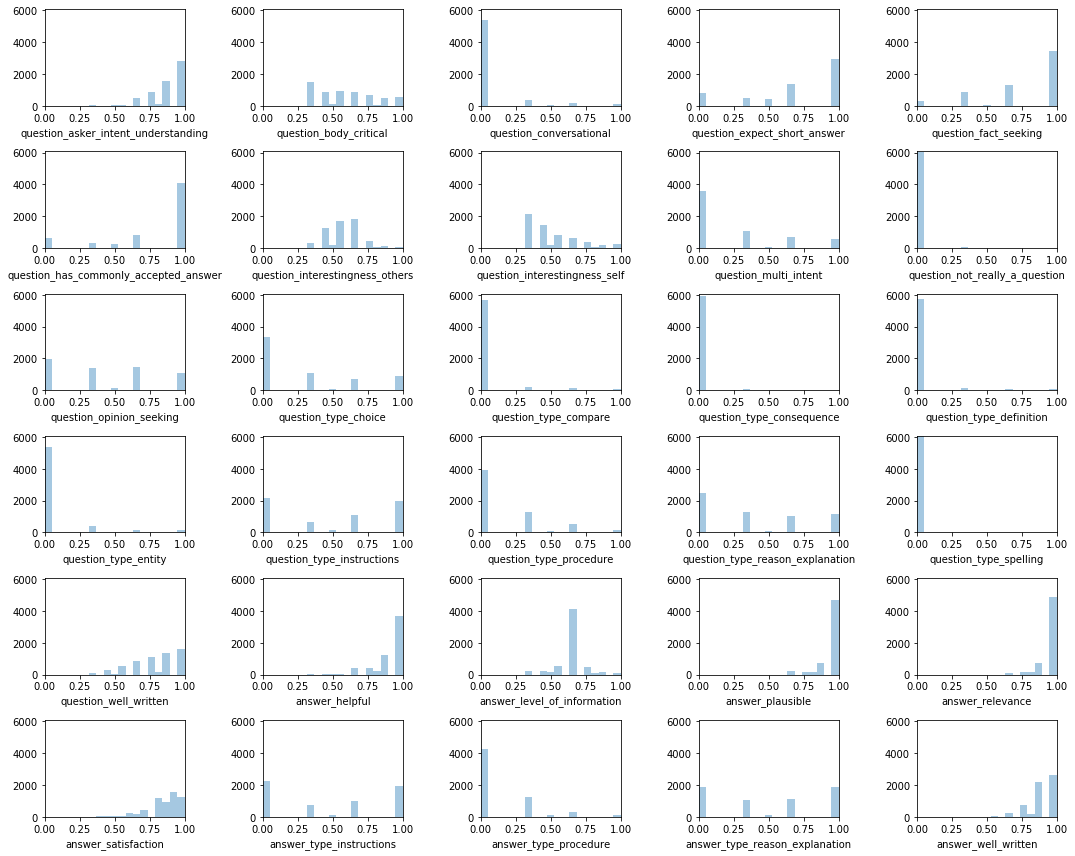

In [40]:
fig, axes = plt.subplots(6, 5, figsize=(15, 12))
axes = axes.ravel()
bins = np.linspace(0, 1, 20)

for i, col in enumerate(sample_submission.columns[1:]):
    ax = axes[i]
    sns.distplot(train[col], label=col, kde=False, bins=bins, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 6079])
plt.tight_layout()
plt.show()
plt.close()

#### Duplicate and missing values in train data

In [46]:
train.drop_duplicates() # no duplicates present

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.000000,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.000000,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.000000,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.000000,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,9642,Using a ski helmet for winter biking,I am curious if anyone uses a skiing helmet fo...,sixtyfootersdude,https://bicycles.stackexchange.com/users/134,If you're thinking about wearing a ski helmet ...,Matt Leo,https://bicycles.stackexchange.com/users/3340,http://bicycles.stackexchange.com/questions/99...,CULTURE,...,0.777778,1.000000,0.555556,1.000000,1.000000,0.866667,0.000000,0.000000,0.000000,0.888889
6075,9643,Adjustment to road bike brakes for high grade ...,I have a road bike with a front brake that wea...,ash,https://bicycles.stackexchange.com/users/14519,\nYou can replace the pads (as stated elsewher...,Daniel R Hicks,https://bicycles.stackexchange.com/users/1584,http://bicycles.stackexchange.com/questions/25...,CULTURE,...,0.777778,0.888889,0.555556,1.000000,1.000000,0.733333,0.666667,0.333333,0.000000,0.888889
6076,9645,Suppress 'file truncated' messages when using ...,I'm tailing a log file using tail -f messages....,Maneating Koala,https://unix.stackexchange.com/users/60445,Maybe help if can be fixes origin of this erro...,BG Bruno,https://unix.stackexchange.com/users/68208,http://unix.stackexchange.com/questions/169054...,TECHNOLOGY,...,0.444444,0.888889,0.555556,0.888889,0.888889,0.800000,1.000000,0.000000,0.333333,0.555556
6077,9646,When should a supervisor be a co-author?,What are people's views on this? To be specif...,MrB,https://mathoverflow.net/users/2189,"As a non-mathematician, I am somewhat mystifie...",angela,https://mathoverflow.net/

In [50]:
train.isnull().sum() # no missing values

qa_id                                    0
question_title                           0
question_body                            0
question_user_name                       0
question_user_page                       0
answer                                   0
answer_user_name                         0
answer_user_page                         0
url                                      0
category                                 0
host                                     0
question_asker_intent_understanding      0
question_body_critical                   0
question_conversational                  0
question_expect_short_answer             0
question_fact_seeking                    0
question_has_commonly_accepted_answer    0
question_interestingness_others          0
question_interestingness_self            0
question_multi_intent                    0
question_not_really_a_question           0
question_opinion_seeking                 0
question_type_choice                     0
question_ty

#### Exploring categories and hosts

In [134]:
# distribution of train Q&A pairs by category
temp = train["category"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Distribution of train Q&A pairs by category')
# Over 40% of the Q&A pairs are in Tech category

In [54]:
# top 10 hosts by Q&A pairs
temp = train["host"].value_counts()[:10]
df = pd.DataFrame(temp)
df.iplot(kind='bar',labels='labels',values='values', title='Top 10 hosts by Q&A pairs')
# 1253 or 20.6% (1253/6079) Q&A pairs are hosted on stackoverflow.com

In [186]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=train[train.category=='TECHNOLOGY'].host.value_counts().index, 
                     values=train[train.category=='TECHNOLOGY'].host.value_counts().values, name="TECHNOLOGY"),1, 1)
fig.add_trace(go.Pie(labels=train[train.category=='CULTURE'].host.value_counts().index, 
                     values=train[train.category=='CULTURE'].host.value_counts().values, name="CULTURE"),1, 2)
fig.add_trace(go.Pie(labels=train[train.category=='SCIENCE'].host.value_counts().index, 
                     values=train[train.category=='SCIENCE'].host.value_counts().values, name="SCIENCE"),2, 1)
fig.add_trace(go.Pie(labels=train[train.category=='LIFE_ARTS'].host.value_counts().index, 
                     values=train[train.category=='LIFE_ARTS'].host.value_counts().values, name="LIFE_ARTS"),2, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Distribution of train Q&A pairs by category, host",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='TECHNOLOGY', x=0.19, y=0.8, font_size=5, showarrow=False),
                 dict(text='CULTURE', x=0.8, y=0.8, font_size=5, showarrow=False),
                 dict(text='SCIENCE', x=0.2, y=0.2, font_size=5, showarrow=False),
                 dict(text='LIFE_ARTS', x=0.8, y=0.2, font_size=5, showarrow=False)])
fig.show()
# stackoverflow category - only 1 host
# technology category - 31 hosts, superuser.com highest in technology with 9.3% Q&A pairs
# culture category - 12 hosts, english.stackexchange.com in culture highest with 23.8% Q&A pairs
# science category - 12 hosts, math.stackexchange.com highest in science with 26.2% Q&A pairs
# life arts category - 9 hosts, academia.stackexchange.com highest in life arts with 14.5% Q%A pairs

#### Exploring users

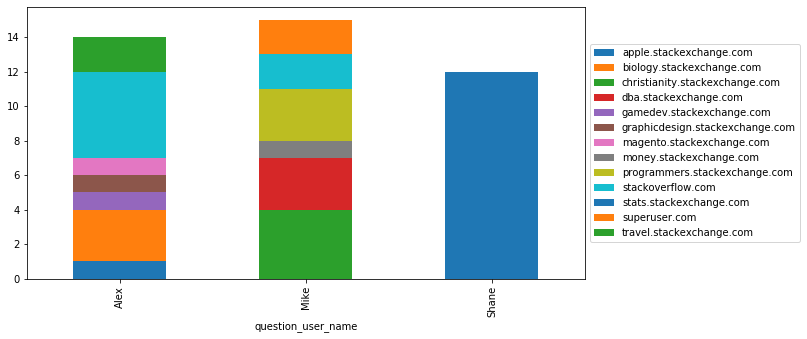

In [216]:
# top 3 users by questions
temp = train.groupby(['question_user_name','host'],as_index=False).count()
temp = temp[temp['question_user_name'].isin(train.groupby('question_user_name').agg({'qa_id':['count']}).sort_values([('qa_id','count')],ascending=False).head(3).index)]

temp.pivot(index='question_user_name', columns='host', values='qa_id').plot.bar(stacked=True, figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# User Mike has asked the highest number of questions i.e. 15 across 6 hosts

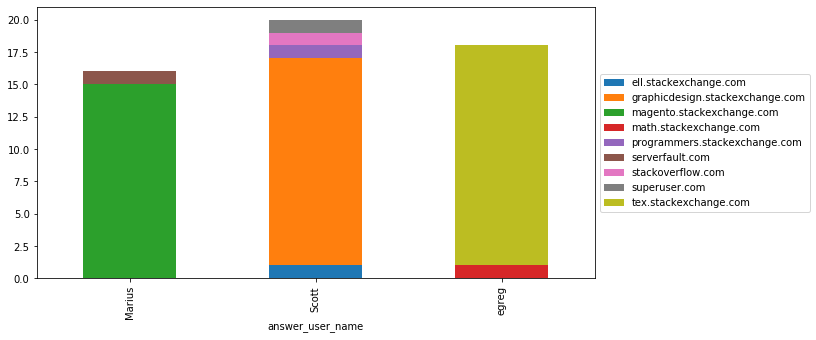

In [217]:
# top 10 users by answers
temp = train.groupby(['answer_user_name','host'],as_index=False).count()
temp = temp[temp['answer_user_name'].isin(train.groupby('answer_user_name').agg({'qa_id':['count']}).sort_values([('qa_id','count')],ascending=False).head(3).index)]

temp.pivot(index='answer_user_name', columns='host', values='qa_id').plot.bar(stacked=True, figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# User Scott has asked the highest number of questions i.e. 20 across 5 hosts

Text(0.5, 1.0, 'Common users in both question & answer in train data')

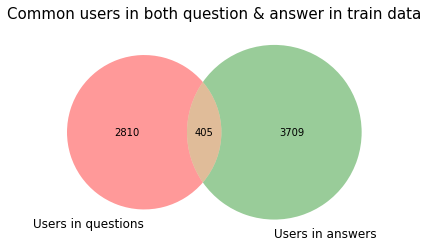

In [218]:
# common users in both questions & answers
v.venn2([set(train.question_user_name.unique()), set(train.answer_user_name.unique())], set_labels = ('Users in questions', 'Users in answers') )
plt.title("Common users in both question & answer in train data", fontsize=15)
# 405 or 6.6% (405/6114) common users in both questions & answers

#### Exploring questions and answers

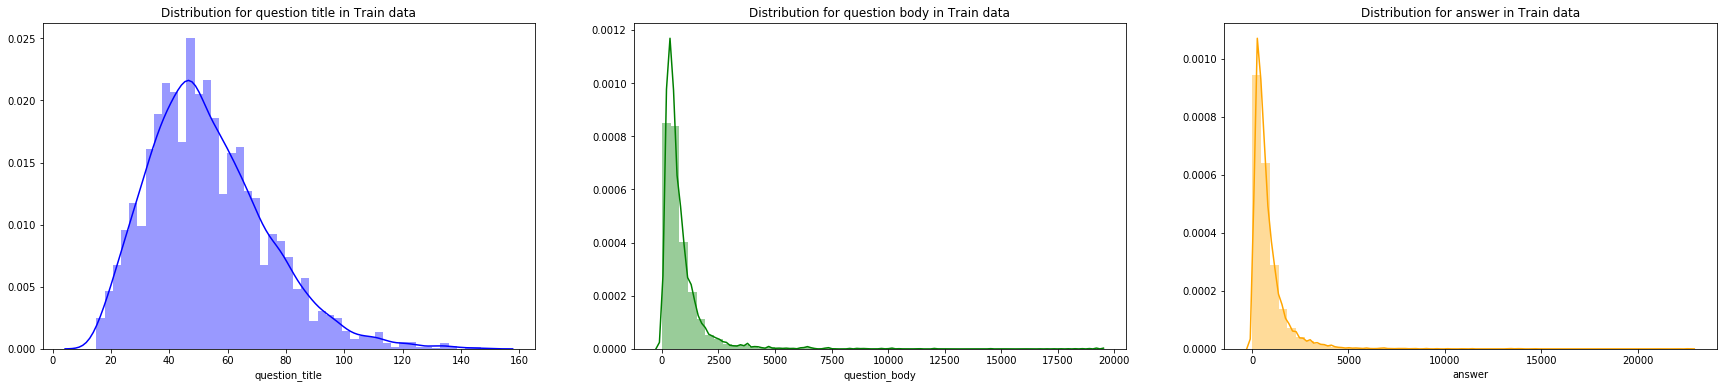

In [233]:
train_question_title=train['question_title'].str.len()
train_question_body=train['question_body'].str.len()
train_answer=train['answer'].str.len()
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(30,6))
sns.distplot(train_question_title,ax=ax1,color='blue')
sns.distplot(train_question_body,ax=ax2,color='green')
sns.distplot(train_answer,ax=ax3,color='orange')
ax1.set_title('Distribution for question title in Train data')
ax2.set_title('Distribution for question body in Train data')
ax3.set_title('Distribution for answer in Train data')
plt.show()

In [232]:
train['answer'].str.len()

0        833
1        451
2       1048
3       1337
4        225
        ... 
6074    1309
6075    1122
6076     134
6077    1429
6078    1129
Name: answer, Length: 6079, dtype: int64